<a href="https://colab.research.google.com/github/fantom3ds/fashion_neural_network/blob/master/fashion_mnist_prevent_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

In [0]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [0]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [0]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

In [0]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [0]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 
x_test = x_test / 255 

**Работа с правильными ответами**

In [0]:
n = 0

In [0]:
print(y_train[n])

**Преобразуем метки в формат one hot encoding**

In [0]:
y_train = utils.to_categorical(y_train, 10)

In [0]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [0]:
print(y_train[n])

## Создаем нейронную сеть

**Создаем последовательную модель**

In [0]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

## Обучаем нейронную сеть

In [0]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

240/240 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.8904 - val_loss: 0.3571 - val_accuracy: 0.8748
Epoch 97/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3184 - accuracy: 0.8899 - val_loss: 0.3566 - val_accuracy: 0.8737
Epoch 98/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.8903 - val_loss: 0.3563 - val_accuracy: 0.8747
Epoch 99/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8902 - val_loss: 0.3563 - val_accuracy: 0.8748
Epoch 100/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3161 - accuracy: 0.8909 - val_loss: 0.3540 - val_accuracy: 0.8742


## Сохраняем нейронную сеть для последующего использования

In [0]:
model.save('fashion_mnist_dense.h5')

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3758 - accuracy: 0.8670


In [0]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 86.7


## Используем сеть для распознавания предметов одежды

In [0]:
n_rec = 496

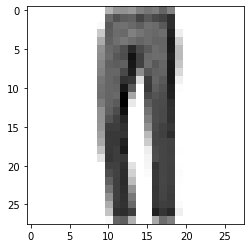

In [0]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [0]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [0]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [0]:
prediction

array([[4.7599136e-05, 9.9985886e-01, 8.5891361e-06, 7.6659853e-05,
        5.9715994e-06, 7.4017454e-09, 3.5748360e-07, 1.8412474e-07,
        1.8377486e-06, 4.5439861e-09]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [0]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 1
Название класса: брюки


**Печатаем правильный ответ**

In [0]:
label = np.argmax(y_test[0])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 9
Название класса: ботинки


## Загружаем свою картинку

In [0]:
files.upload()

{}

Проверяем загрузку картинки

In [0]:
!ls

fashion_mnist_dense.h5	sample_data


Загружаем картинку из файла

In [0]:
img_path = 'tshirt.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

FileNotFoundError: ignored

Показываем картинку

In [0]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [0]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [0]:
prediction = model.predict(x)

Результаты распознавания

In [0]:
prediction

In [0]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])